In [319]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from helpers import *
from implementations import *
from plots import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Load the training data into feature matrix, class labels, and event ids:

In [320]:
y, x, _ = load_csv_data('data/train.csv')

In [321]:
x_s = sanitize(x)

In [322]:
x_train, x_test, y_train, y_test = split_data(x_s, y, 0.8)

In [323]:
x_train = add_bias(x_train)
x_test = add_bias(x_test)

#### Sanitizing the missing values and standardize the features

In [324]:
def split_data_22(x_o, y_o):
    y = y_o.copy()
    x = x_o.copy()
    y = y.reshape((y.shape[0], 1))

    feature_22 = x[:, 23]
    x_minus_22 = x[:, np.array(range(x.shape[1])) != 23]
    x_sep = []
    y_sep = []

    categories_22 = np.unique(feature_22)

    for i in np.unique(feature_22):
        print(i)
        x_sep.append(x_minus_22[feature_22 == i, :])
        y_sep.append(y[feature_22 == i, :])

    return x_sep, y_sep

In [325]:
x_sep_train, y_sep_train = split_data_22(x_train, y_train)
x_sep_test, y_sep_test = split_data_22(x_test, y_test)

0.0
1.0
2.0
3.0
0.0
1.0
2.0
3.0


In [326]:
print(np.sum([y.shape[0] for y in y_sep_test]))
print(np.sum([y.shape[0] for y in y_sep_train]))

50000
200000


In [327]:
extended_x_sep_train = [feature_expansion(e) for e in x_sep_train]
extended_x_sep_test = [feature_expansion(e) for e in x_sep_test]

In [328]:
def ridge(extended_x_sep, y_sep, _lambda):
    accuracies = []
    weights = []
    ys = []

    for i, x_chunk in enumerate(extended_x_sep):
        w_init = np.random.rand(x_chunk.shape[1], 1)
        w, loss = ridge_regression(y_sep[i], x_chunk, _lambda)
        y_pred = predict_labels(w, x_chunk)
        accuracies.append(compute_accuracy_linear_reg(y_sep[i], y_pred))
        weights.append(w)
        ys.append(y_pred)

    return weights, weighted_average(y_sep, accuracies)

In [329]:
def ridge_test(extended_x_sep, y_sep, w):
    accuracies = []
    for i, x_chunk in enumerate(extended_x_sep):
        y_pred = predict_labels(w[i], x_chunk)
        accuracies.append(compute_accuracy_linear_reg(y_sep[i], y_pred))
    return weighted_average(y_sep, accuracies)

In [330]:
def weighted_average(y_sep, accuracies):
    y_sep_sizes = np.array([y.shape[0] for y in y_sep])
    return np.sum(np.array(accuracies) * y_sep_sizes) / np.sum(y_sep_sizes)

In [331]:
a = 4*[2]
np.array(a) / np.array(a)

array([1., 1., 1., 1.])

[0.822375, 0.822375, 0.822375, 0.822355, 0.82235, 0.822345, 0.82234, 0.82234, 0.82234, 0.822335, 0.822335, 0.822335, 0.82234, 0.82234, 0.82234, 0.822335, 0.82234, 0.822345, 0.82235, 0.822345, 0.82234, 0.822345, 0.82236, 0.822375, 0.822345, 0.82232, 0.822325, 0.822395, 0.822425, 0.822455, 0.822445, 0.822445, 0.82239, 0.822395, 0.822385, 0.82235, 0.82232, 0.822325, 0.82232, 0.8223, 0.822265, 0.82229, 0.822265, 0.82217, 0.82208, 0.82199, 0.821805, 0.82159, 0.821365, 0.82117, 0.82078, 0.820125, 0.819655, 0.818725, 0.81759] [0.81898, 0.81898, 0.819, 0.81896, 0.81896, 0.81896, 0.81896, 0.81896, 0.81896, 0.81896, 0.81896, 0.81896, 0.81896, 0.81896, 0.81896, 0.81896, 0.81894, 0.81894, 0.81896, 0.81898, 0.81894, 0.81896, 0.819, 0.819, 0.81902, 0.819, 0.8189, 0.81888, 0.81886, 0.81882, 0.81882, 0.8188, 0.8188, 0.81878, 0.81874, 0.81888, 0.81892, 0.81888, 0.8188, 0.81878, 0.8189, 0.8187, 0.81866, 0.81868, 0.81862, 0.81878, 0.81864, 0.81836, 0.81802, 0.81798, 0.81814, 0.81754, 0.8168, 0.81628, 0.8

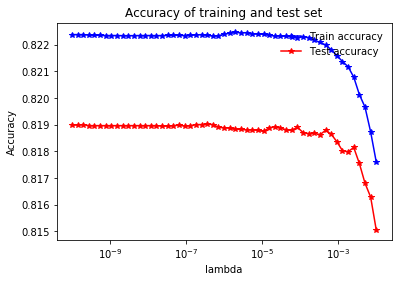

<Figure size 504x360 with 0 Axes>

In [332]:
lambdas = np.logspace(-10, -2, 55)
degree = 1
rmse_tr = []
rmse_te = []
for ind, lambda_ in enumerate(lambdas):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with a given lambda
    # ***************************************************
    w, acc_train = ridge(extended_x_sep_train, y_sep_train, lambda_)
    rmse_tr.append(acc_train)
    acc_test = ridge_test(extended_x_sep_test, y_sep_test, w)
    rmse_te.append(acc_test)

# Plot the obtained results
print(rmse_tr, rmse_te)
plot_train_test(rmse_tr, rmse_te, lambdas, degree)

In [333]:
lambdas[np.argmax(rmse_te)]

3.5938136638046254e-07

In [334]:
np.max(rmse_te)

0.81902

In [258]:
# Rebuilding final y for submission, in progress
N = x_train.shape[0]
predictions = np.zeros((N,1))

for i, value in enumerate(categories_22):
    ind = np.arange(N)[feature_22 == value]
    predictions[ind] = ys[i]

predictions

NameError: name 'ys' is not defined

In [ ]:
compute_accuracy_linear_reg(y, predictions)

## Generate predictions and save ouput in csv format for submission:


In [34]:
_, x_test, ids_test = load_csv_data('data/test.csv')

In [39]:
extended_x_sep_t = [add_sqrt(e) for e in x_sep_t]
extended_x_sep_t[0]

array([[ 0.        ,  0.85695592, -1.41340956, ..., -0.86258746,
         0.73572682, -0.67727841],
       [-0.07180953,  0.19686173,  0.37643086, ..., -0.86258746,
         0.73572682, -0.67727841],
       [ 0.24635352, -0.52705785,  0.39940857, ..., -0.86258746,
         0.73572682, -0.67727841],
       ...,
       [-0.05036034,  0.75185168,  0.06502106, ..., -0.86258746,
         0.73572682, -0.67727841],
       [-0.23553134, -1.1138051 , -0.39465676, ..., -0.86258746,
         0.73572682, -0.67727841],
       [-0.51947781,  0.87164791, -0.08655773, ..., -0.86258746,
         0.73572682, -0.67727841]])

In [40]:
y_sep_t = []

for i, w in enumerate(weights):
    y_t = predict_labels(w, extended_x_sep_t[i])
    y_sep_t.append(y_t)

In [42]:
# Rebuilding final y for submission, in progress
N = x_test.shape[0]
predictions_t = np.zeros((N,1))

for i, value in enumerate(categories_22_t):
    ind = np.arange(N)[feature_22_t == value]
    predictions_t[ind] = y_sep_t[i]

predictions_t

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [ 1.],
       [-1.],
       [-1.]])

In [45]:
OUTPUT_PATH = 'predictions.csv'
create_csv_submission(ids_test, predictions_t, OUTPUT_PATH)